In [2]:
# pip install tensorflow

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1029s 467ms/step - accuracy: 0.4081 - loss: 2.0937 - val_accuracy: 0.8071 - val_loss: 0.6080
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 968s 441ms/step - accuracy: 0.8424 - loss: 0.5019 - val_accuracy: 0.9104 - val_loss: 0.2776
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 918s 418ms/step - accuracy: 0.9083 - loss: 0.2863 - val_accuracy: 0.9348 - val_loss: 0.2013
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 929s 423ms/step - accuracy: 0.9366 - loss: 0.1972 - val_accuracy: 0.9214 - val_loss: 0.2675
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 950s 432ms/step - accuracy: 0.9543 - loss: 0.1378 - val_accuracy: 0.9546 - val_loss: 0.1419
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 958s 436ms/step - accuracy: 0.9644 - loss: 0.1109 - val_accuracy: 0.9550 - val_loss: 0.1455
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 975s 444ms/step - accuracy: 0.9706 - loss: 0.0911 - val_accuracy: 0.9672 - val_loss: 0.1033
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 951s 433ms/step - a

In [20]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 237s 108ms/step - accuracy: 0.9945 - loss: 0.0175
Training accuracy: 0.9951632618904114


In [21]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 57s 104ms/step - accuracy: 0.9696 - loss: 0.0923
Validation accuracy: 0.9720008969306946


In [22]:
cnn.save('trained_plant_disease_model.keras')

In [23]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6119354367256165,
  0.8653531670570374,
  0.916693925857544,
  0.9409915208816528,
  0.9570239782333374,
  0.966356098651886,
  0.9717049598693848,
  0.9766128659248352,
  0.9803257584571838,
  0.9817056655883789],
 'loss': [1.3139450550079346,
  0.4236571192741394,
  0.25555872917175293,
  0.1810486763715744,
  0.12869730591773987,
  0.10429000854492188,
  0.08515944331884384,
  0.07336626201868057,
  0.06128682941198349,
  0.055438920855522156],
 'val_accuracy': [0.8070794343948364,
  0.9103687405586243,
  0.9347826242446899,
  0.9213521480560303,
  0.954643726348877,
  0.9550421237945557,
  0.9671636819839478,
  0.9540177583694458,
  0.9591395258903503,
  0.9720008969306946],
 'val_loss': [0.608020007610321,
  0.2775832712650299,
  0.20130470395088196,
  0.2674589455127716,
  0.1418599784374237,
  0.14548654854297638,
  0.10328509658575058,
  0.15201745927333832,
  0.1463586390018463,
  0.08721565455198288]}

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


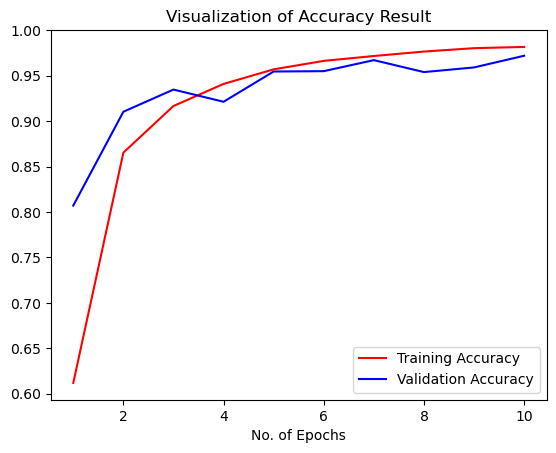

In [26]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [27]:
class_name = validation_set.class_names

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [29]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 192s 11ms/step


In [30]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [31]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [32]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [34]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.97      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.98       440
                                   Apple___healthy       0.96      0.92      0.94       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.91      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

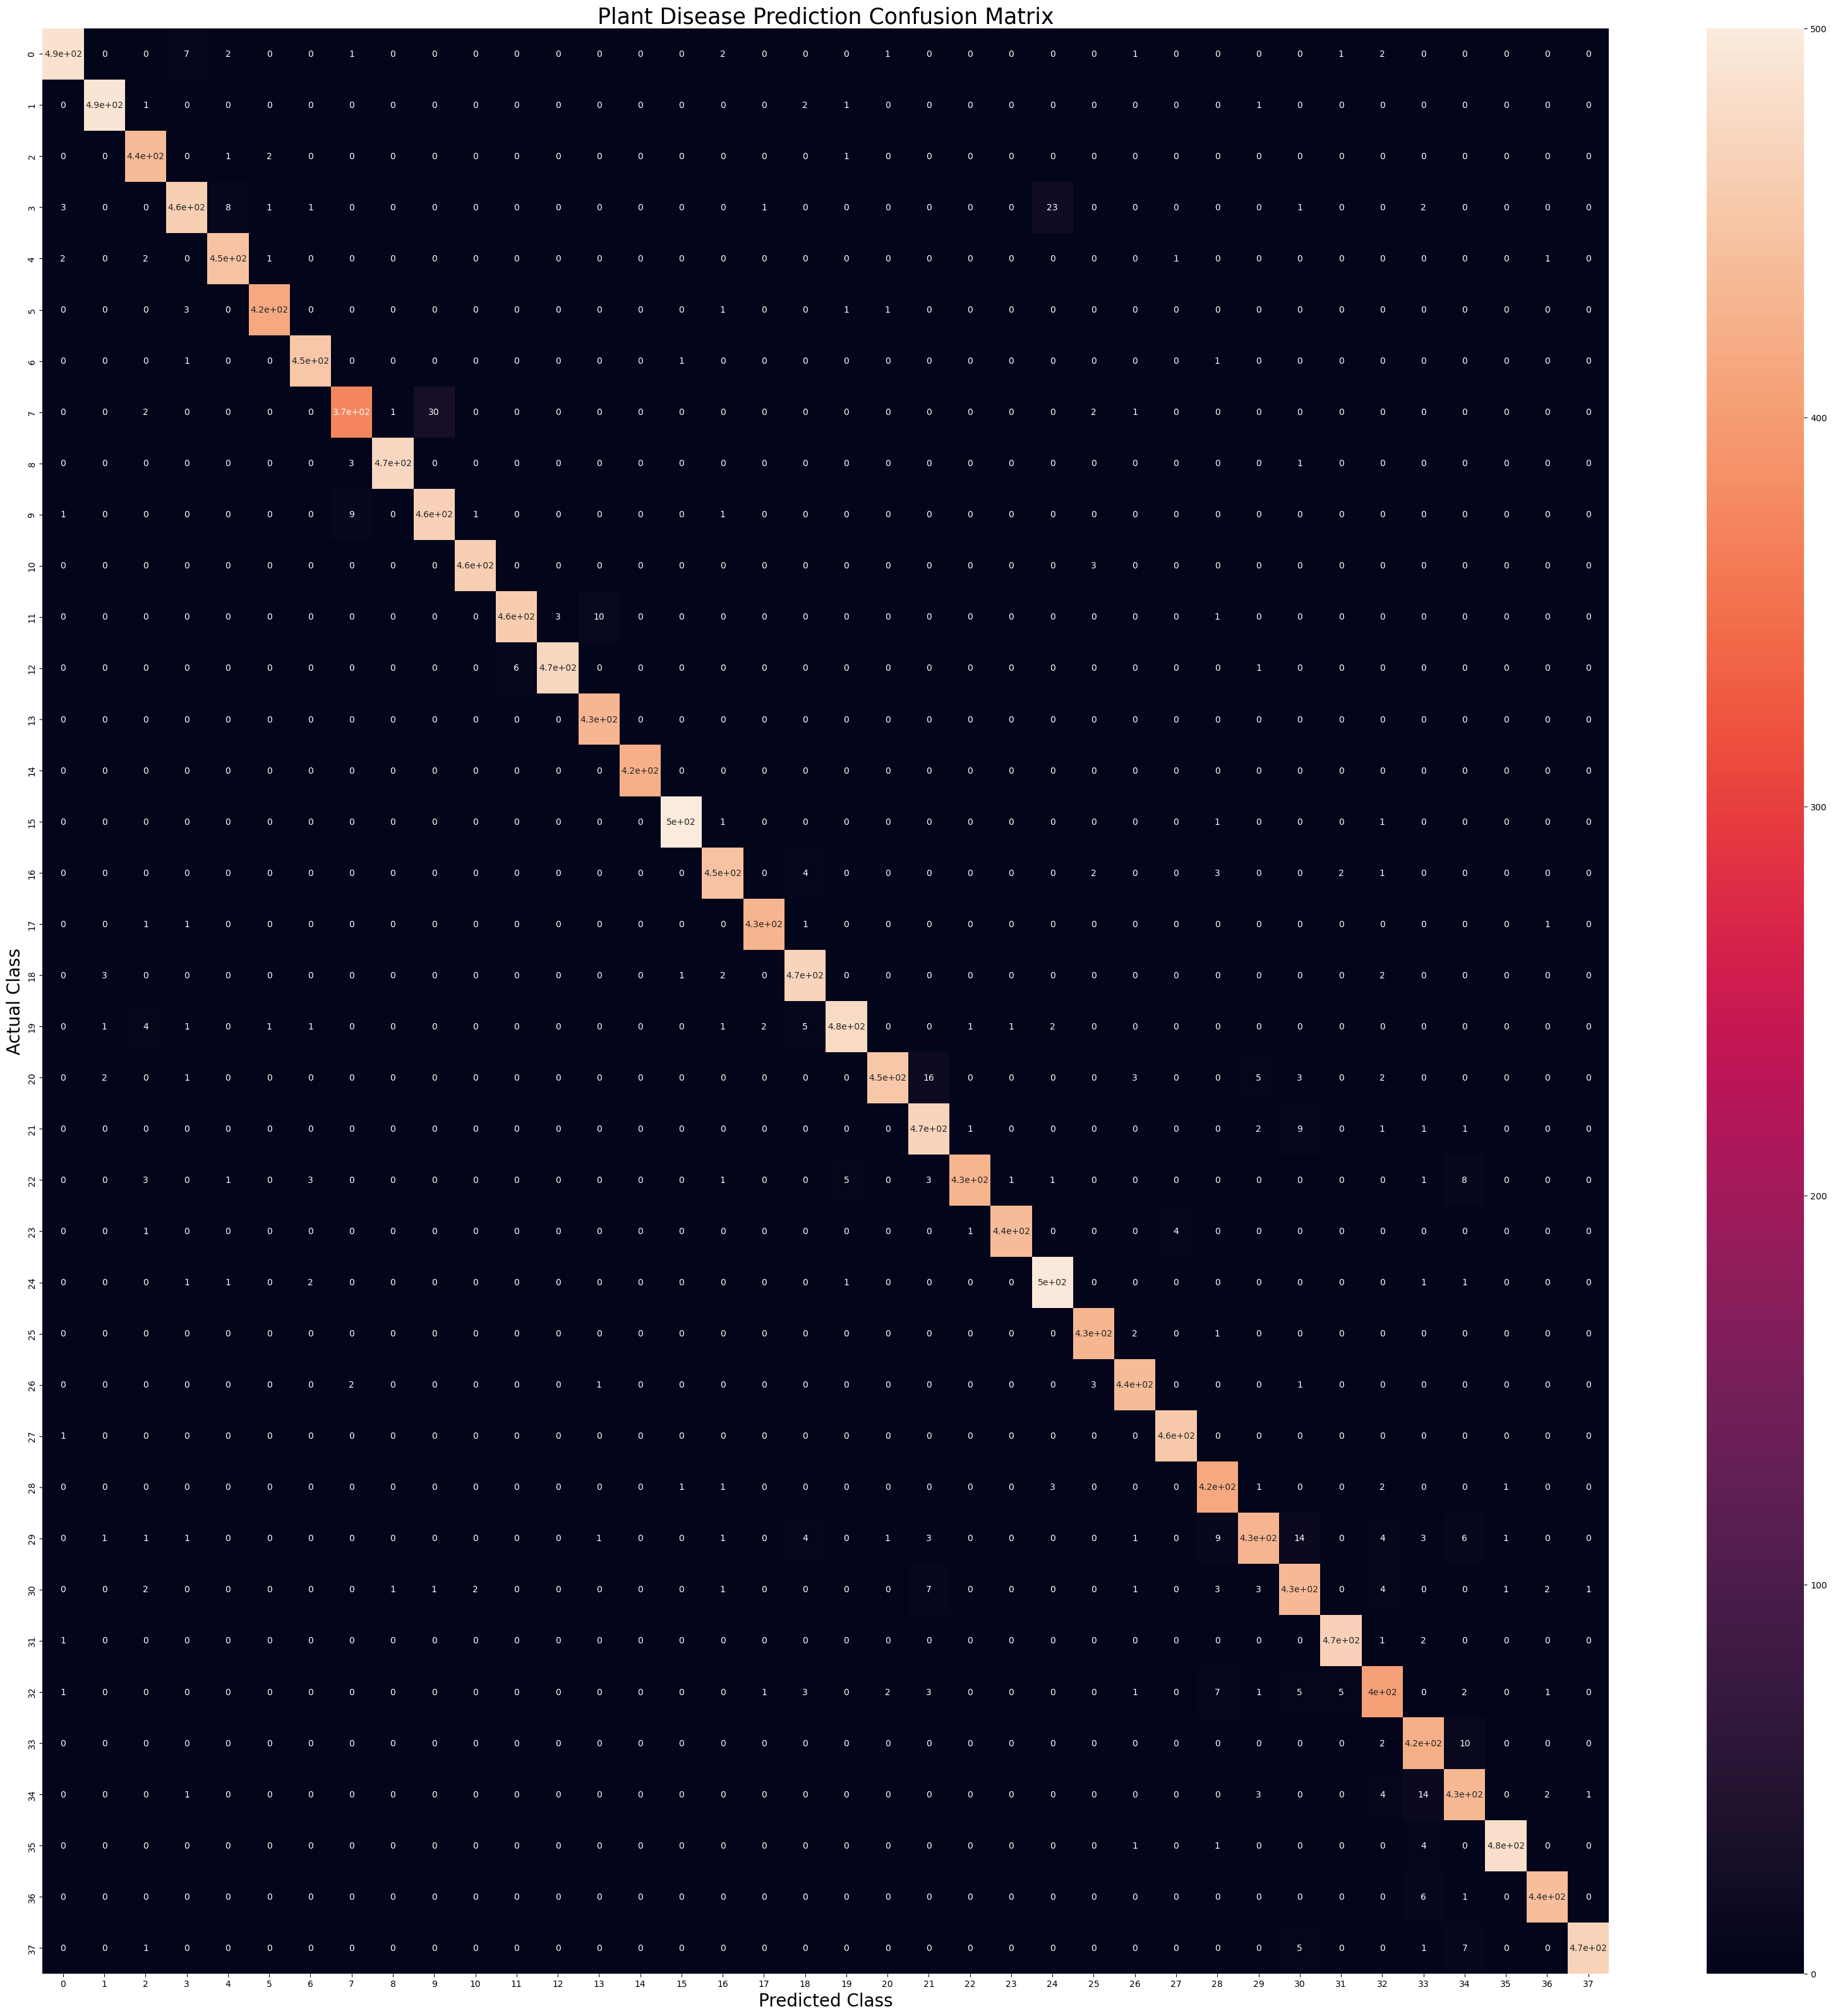

In [35]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [43]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('trained_plant_disease_model.keras')


In [44]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\admin\AppData\Local\Temp\tmpilhrfj90\assets


INFO:tensorflow:Assets written to: C:\Users\admin\AppData\Local\Temp\tmpilhrfj90\assets


Saved artifact at 'C:\Users\admin\AppData\Local\Temp\tmpilhrfj90'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  1792839111440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792839112016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792839112208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792839113168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792839113360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792839113936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792839114128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792839114704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792839114896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1792839115472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  17928

In [45]:
# Save the converted model to a .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
# Optional: Apply Optimization (Quantization)

# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_model = converter.convert()

# # Save the optimized model
# with open('model_quantized.tflite', 'wb') as f:
#     f.write(tflite_model)
